In [1]:
#Importing the Libraries
import pandas as pd

from datetime import datetime

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
# from keras.models import Sequential
# from keras.layers import Dense
# import keras.backend as K
# from keras.callbacks import EarlyStopping
#from keras.optimizers import Adam
# from keras.models import load_model
# from keras.layers import LSTM
# from keras.utils.vis_utils import plot_model

In [2]:
#Get the Dataset
df=pd.read_csv("NewData/JPM2016_2022.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,63.950001,64.059998,63.009998,63.619999,53.557831,25393200
2016-01-05,63.700001,64.129997,63.040001,63.730000,53.650433,16566700
2016-01-06,62.720001,63.130001,62.340000,62.810001,52.875938,22961500
2016-01-07,61.459999,62.000000,60.080002,60.270000,50.737659,27630900
2016-01-08,61.130001,61.270000,58.849998,58.919998,49.601185,22373300


In [3]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [4]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (1606, 6)
Null Value Present:  False


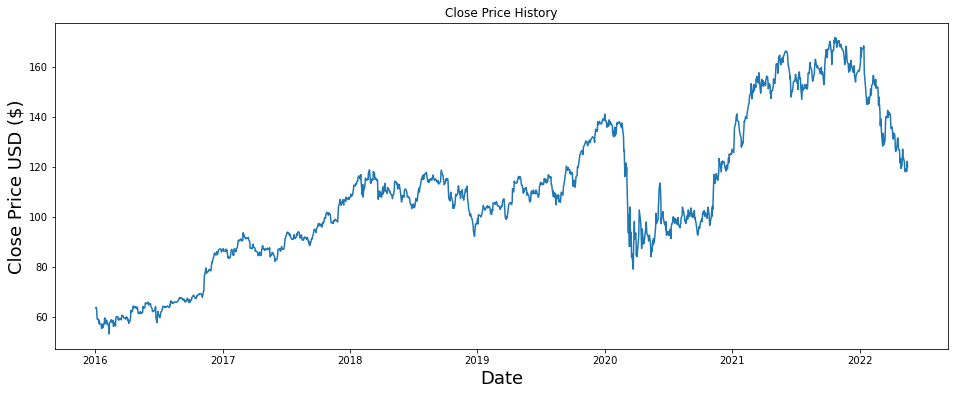

In [5]:
# get the current prices: 

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1526

In [7]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.08887203],
       [0.08979867],
       [0.0820487 ],
       ...,
       [0.54915342],
       [0.58217505],
       [0.56456909]])

In [8]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.08887203, 0.08979867, 0.0820487 , 0.06065201, 0.04927974,
       0.04852162, 0.0496167 , 0.03597001, 0.04321457, 0.03344285,
       0.03319011, 0.02055428, 0.01836408, 0.0326847 , 0.02181788,
       0.03377982, 0.03344285, 0.03546457, 0.05416561, 0.04877433,
       0.0333586 , 0.03655968, 0.04489935, 0.03942381, 0.02923091,
       0.02636678, 0.02063853, 0.        , 0.03723361, 0.04447812,
       0.04801617, 0.03992925, 0.04001348, 0.0463314 , 0.02569286,
       0.02586133, 0.03319011, 0.0376548 , 0.02720916, 0.05163846,
       0.05635581, 0.0580406 , 0.05879875, 0.05787212, 0.0481004 ,
       0.05096453, 0.04666836, 0.05281779, 0.05096453, 0.05163846,
       0.04927974, 0.0478477 , 0.06242103, 0.06225254, 0.06039931,
       0.05787212, 0.05399714, 0.05332324, 0.05020638, 0.05593462])]
[0.05180693329801145]

[array([0.08887203, 0.08979867, 0.0820487 , 0.06065201, 0.04927974,
       0.04852162, 0.0496167 , 0.03597001, 0.04321457, 0.03344285,
       0.03319011, 0.02055428, 0.01

(1466, 60, 1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1466/1466 [==============================] - 40s 25ms/step - loss: 0.0021


In [13]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

9.684181076507748

<ipython-input-14-c5ce0592db5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


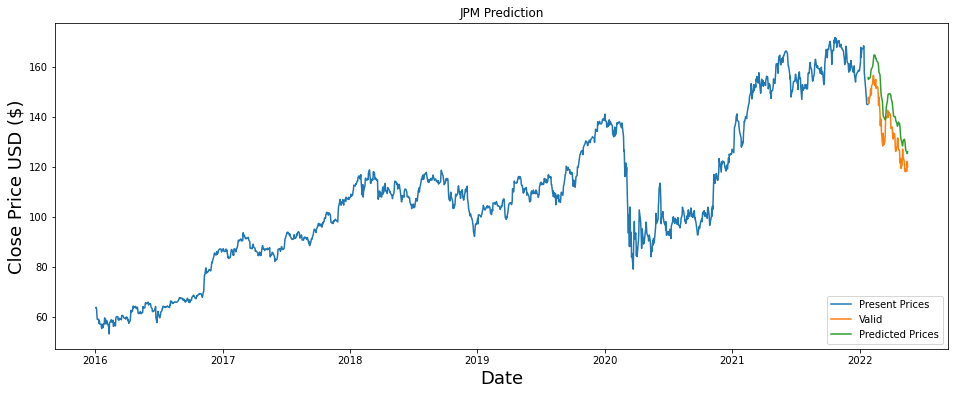

In [14]:
# Plot the future data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('JPM Prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Present Prices', 'Valid', 'Predicted Prices'], loc='lower right')
plt.show()

In [17]:
valid

,Close,Predictions
Date,,
2022-02-11,47.919998,51.569416
2022-02-14,47.419998,51.623367
2022-02-15,47.790001,51.435368
2022-02-16,47.680000,51.223740
2022-02-17,46.070000,51.008865
...,...,...
2022-05-12,35.070000,38.641537
2022-05-13,35.169998,38.217499
2022-05-16,34.810001,37.831581
